In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
StockPrices = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/JPX/train_files/stock_prices.csv")
trades = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/JPX/train_files/trades.csv")
secondary_stock_prices = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/JPX/train_files/secondary_stock_prices.csv")
options = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/JPX/train_files/options.csv")
financials = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/JPX/train_files/financials.csv")

C:\Users\samue\AppData\Local\Temp\ipykernel_41444\4000174416.py:4: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  options = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/JPX/train_files/options.csv")
C:\Users\samue\AppData\Local\Temp\ipykernel_41444\4000174416.py:5: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  financials = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/JPX/train_files/financials.csv")


In [5]:
StockPrices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [5]:
trades.dropna().head(20)

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
6,2017-01-13,2017-01-04,2017-01-06,Growth Market (Mothers/JASDAQ),4.592074e+08,4.593263e+08,9.185338e+08,118862.0,1.605747e+07,1.282267e+07,...,99878.0,-22676.0,4758211.0,5797986.0,10556197.0,1039775.0,21362.0,110809.0,132171.0,89447.0
7,2017-01-13,2017-01-04,2017-01-06,Prime Market (First Section),8.476800e+09,8.483346e+09,1.696015e+10,6546353.0,1.311271e+09,1.453327e+09,...,19450660.0,-1762918.0,292932297.0,245322795.0,538255092.0,-47609502.0,22410692.0,21764485.0,44175177.0,-646207.0
8,2017-01-13,2017-01-04,2017-01-06,Standard Market (Second Section),2.223549e+08,2.217707e+08,4.441256e+08,-584153.0,1.309361e+07,6.535935e+06,...,39167.0,-34565.0,1328241.0,1807118.0,3135359.0,478877.0,48202.0,36455.0,84657.0,-11747.0
12,2017-01-19,2017-01-10,2017-01-13,Growth Market (Mothers/JASDAQ),5.375720e+08,5.374116e+08,1.074984e+09,-160453.0,1.633072e+07,1.293260e+07,...,133723.0,25075.0,3217637.0,3798890.0,7016527.0,581253.0,76618.0,40048.0,116666.0,-36570.0
13,2017-01-19,2017-01-10,2017-01-13,Prime Market (First Section),1.042993e+10,1.042907e+10,2.085900e+10,-855001.0,1.759900e+09,1.716387e+09,...,38816727.0,-12301837.0,287358366.0,261144614.0,548502980.0,-26213752.0,12648955.0,15053471.0,27702426.0,2404516.0
14,2017-01-19,2017-01-10,2017-01-13,Standard Market (Second Section),1.643261e+08,1.634765e+08,3.278026e+08,-849632.0,5.463672e+06,5.722762e+06,...,35274.0,9398.0,845638.0,894044.0,1739682.0,48406.0,64429.0,130643.0,195072.0,66214.0
19,2017-01-26,2017-01-16,2017-01-20,Growth Market (Mothers/JASDAQ),6.817051e+08,6.823101e+08,1.364015e+09,604952.0,1.894316e+07,1.622770e+07,...,171698.0,-17386.0,4171451.0,3379165.0,7550616.0,-792286.0,349263.0,49730.0,398993.0,-299533.0
20,2017-01-26,2017-01-16,2017-01-20,Prime Market (First Section),1.173059e+10,1.172862e+10,2.345921e+10,-1974372.0,1.883676e+09,2.045843e+09,...,50876209.0,-17961043.0,294314672.0,345755681.0,640070353.0,51441009.0,13221980.0,17113521.0,30335501.0,3891541.0
21,2017-01-26,2017-01-16,2017-01-20,Standard Market (Second Section),1.624303e+08,1.619012e+08,3.243315e+08,-529033.0,5.707756e+06,5.507765e+06,...,84175.0,-43079.0,1019663.0,1074765.0,2094428.0,55102.0,104877.0,43993.0,148870.0,-60884.0
26,2017-02-02,2017-01-23,2017-01-27,Growth Market (Mothers/JASDAQ),7.056145e+08,7.055363e+08,1.411151e+09,-78155.0,2.023175e+07,1.700623e+07,...,260173.0,-114877.0,5050301.0,5141097.0,10191398.0,90796.0,163337.0,137906.0,301243.0,-25431.0


In [6]:
secondary_stock_prices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1305,2017-01-04,1305,1594.0,1618.0,1594.0,1615.0,538190,1.0,NaN,False,-0.001855
1,20170104_1306,2017-01-04,1306,1575.0,1595.0,1573.0,1593.0,2494980,1.0,NaN,False,-0.000627
2,20170104_1308,2017-01-04,1308,1557.0,1580.0,1557.0,1578.0,526100,1.0,NaN,False,-0.001900
3,20170104_1309,2017-01-04,1309,28810.0,29000.0,28520.0,28780.0,403,1.0,NaN,False,0.005237
4,20170104_1311,2017-01-04,1311,717.0,735.0,717.0,734.0,5470,1.0,NaN,False,0.001359


In [7]:
options

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.47360,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.47360,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.47360,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.47360,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.47360,14.5932,0.0091,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567689,20211203_199244018,2021-12-03,199244018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,335.0,368.5305,24.70275,19.2442,0.1564,0.0,0.0
3567690,20211203_199245018,2021-12-03,199245018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,1160.0,1253.3703,24.70275,19.0517,0.1564,0.0,0.0
3567691,20211203_199246018,2021-12-03,199246018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,1015.0,1097.0436,24.70275,19.0956,0.1564,0.0,0.0
3567692,20211203_199247018,2021-12-03,199247018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,885.0,959.3328,24.70275,19.1168,0.1564,0.0,0.0


In [8]:
financials

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.017010e+13,20170105_2659,2017-01-05,2659.0,2017-01-05,15:00:00,1.483596e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,285.05,NaN,False,True,False,False,False,31981654.0,18257,31963405.0
4,2.017011e+13,20170105_3050,2017-01-05,3050.0,2017-01-05,15:30:00,1.483598e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92951,2.021112e+13,20211203_6040,2021-12-03,6040.0,2021-12-03,15:00:00,1.638511e+09,1QFinancialStatements_Consolidated_JP,2021-10-31,1Q,...,－,NaN,False,True,False,False,False,16000400.0,836400,15164000.0
92952,2.021120e+13,20211203_6898,2021-12-03,6898.0,2021-12-03,16:00:00,1.638515e+09,3QFinancialStatements_Consolidated_JP,2021-10-31,3Q,...,142.01,NaN,False,False,False,False,False,816979.0,157541,659486.0
92953,2.021120e+13,20211203_6969,2021-12-03,6969.0,2021-12-03,15:00:00,1.638511e+09,ForecastRevision,2022-03-31,FY,...,-147.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92954,2.021112e+13,20211203_8057,2021-12-03,8057.0,2021-12-03,17:00:00,1.638518e+09,1QFinancialStatements_Consolidated_JP,2021-10-20,1Q,...,330.92,NaN,False,True,False,False,False,10419371.0,614032,9805339.0


In [8]:
# financials["ForecastEarningsPerShare"].dropna().astype("float")
financials["ForecastEarningsPerShare"]= pd.to_numeric(financials["ForecastEarningsPerShare"], errors="coerce")

In [9]:
total_df = pd.concat([StockPrices, secondary_stock_prices]).merge(financials[["Date","SecuritiesCode","ForecastEarningsPerShare"]], on=["Date","SecuritiesCode"],how = "left")
total_df

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,ForecastEarningsPerShare
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,NaN
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324,NaN
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154,NaN
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053,NaN
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722736,20211203_9980,2021-12-03,9980,129.0,131.0,129.0,130.0,44400,1.0,NaN,False,0.007692,NaN
4722737,20211203_9986,2021-12-03,9986,1900.0,1900.0,1891.0,1896.0,3800,1.0,NaN,False,0.004213,NaN
4722738,20211203_9995,2021-12-03,9995,390.0,395.0,388.0,394.0,43400,1.0,NaN,False,0.030534,NaN
4722739,20211203_9996,2021-12-03,9996,1490.0,1500.0,1490.0,1500.0,500,1.0,NaN,False,0.022150,NaN


In [13]:
def featuring_Train(df):
    df["Date"]=pd.to_datetime(df["Date"])
    df["ExpectedDividend"]=df["ExpectedDividend"].fillna(0)
    df["ForecastEarningsPerShare"]=df.groupby(["SecuritiesCode"])["ForecastEarningsPerShare"].ffill()
    df["ForecastEarningsPerShare"]=df.groupby(["SecuritiesCode"])["ForecastEarningsPerShare"].bfill()
    df["Open"]=df.groupby(["SecuritiesCode"])["Open"].transform(lambda x: (x - x.mean()) / x.std())
    df["Close"]=df.groupby(["SecuritiesCode"])["Close"].transform(lambda x: (x - x.mean()) / x.std())
    # df["Volume"]=df.groupby(["SecuritiesCode"])["Volume"].transform(lambda x: (x - x.mean()) / x.std())
    df["High"]=df.groupby(["SecuritiesCode"])["High"].transform(lambda x: (x - x.mean()) / x.std())
    df["Low"]=df.groupby(["SecuritiesCode"])["Low"].transform(lambda x: (x - x.mean()) / x.std())
    
    
    df["ForecastEarningsPerShare"]= pd.to_numeric(df["ForecastEarningsPerShare"], errors="coerce")

    df["Open"] = df["Open"].clip(-3,3)
    df["Close"] = df["Close"].clip(-3,3)
    df["High"] = df["High"].clip(-3,3)
    df["Low"]=df["Low"].clip(-3,3)

    df["AdjustmentFactor"]=df["AdjustmentFactor"].clip(df["AdjustmentFactor"].quantile(0.01), df["AdjustmentFactor"].quantile(0.99))

    df["ExpectedDividend"]=df["ExpectedDividend"].clip(df["ExpectedDividend"].quantile(0.01), df["ExpectedDividend"].quantile(0.99))
    df["Target"]=df["Target"].clip(df["Target"].quantile(0.01), df["Target"].quantile(0.99))
    df["ForecastEarningsPerShare"]=df["ForecastEarningsPerShare"].clip(df["ForecastEarningsPerShare"].quantile(0.01), df["ForecastEarningsPerShare"].quantile(0.99))
    return df

In [14]:
new_df = featuring_Train(total_df)
new_df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,ForecastEarningsPerShare
0,20170104_1301,2017-01-04,1301,-0.910403,-0.904972,-0.863772,-0.887736,31400,1.0,0.0,False,0.000730,199.94
1,20170104_1332,2017-01-04,1332,-0.179833,-0.157043,-0.164402,-0.143245,2798500,1.0,0.0,False,0.012324,43.44
2,20170104_1333,2017-01-04,1333,0.200217,0.249622,0.231495,0.297729,270800,1.0,0.0,False,0.006154,265.97
3,20170104_1376,2017-01-04,1376,0.214264,0.429853,0.339813,0.541454,11300,1.0,0.0,False,0.011053,125.20
4,20170104_1377,2017-01-04,1377,-1.254857,-1.086525,-1.127544,-1.029390,150800,1.0,0.0,False,0.003026,46.66


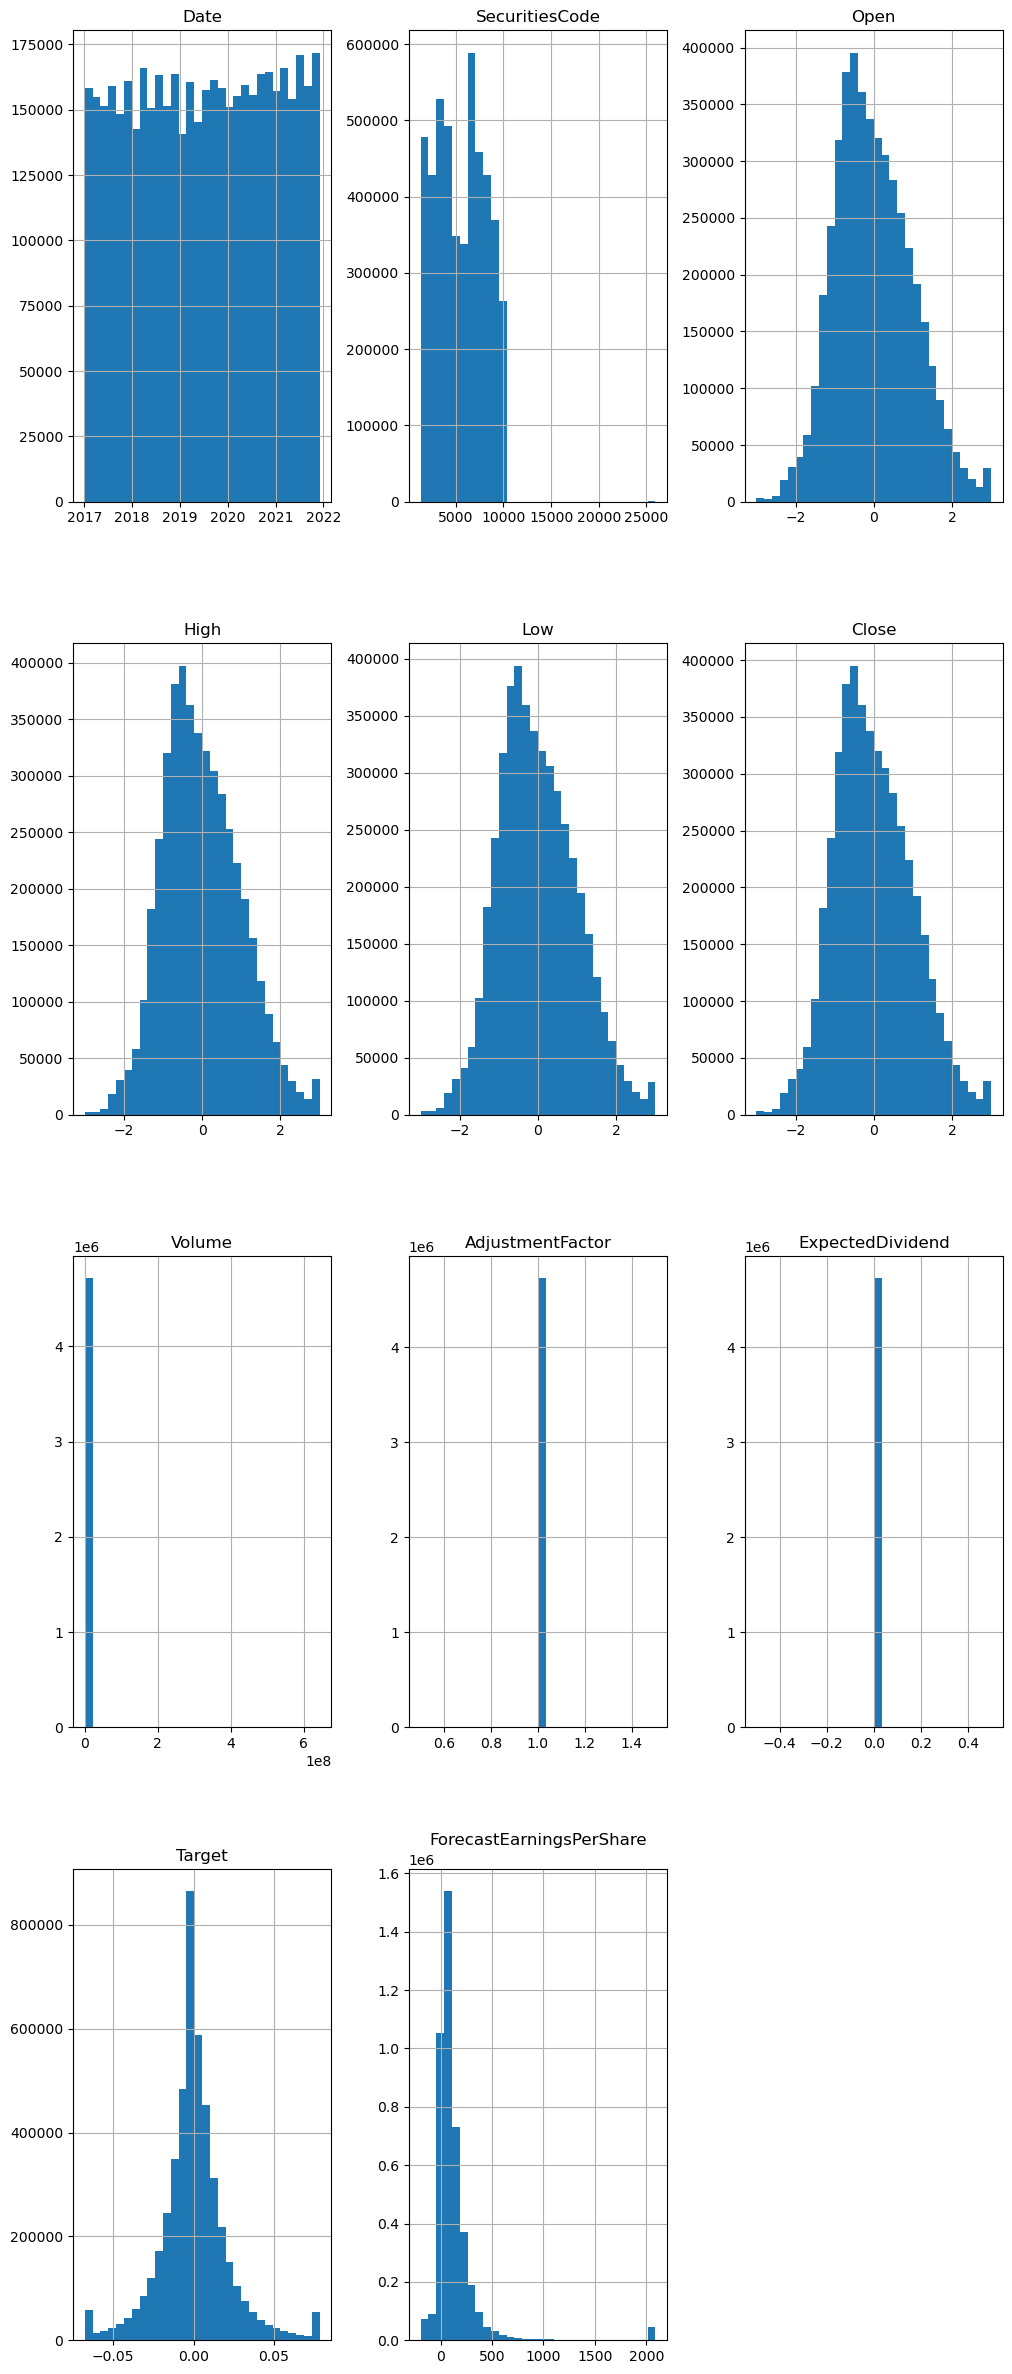

In [15]:
new_df.hist(figsize=(12,30),bins=30)
plt.show()

In [16]:
def make_signals(df):
    df["PrevClose1"]=df.groupby("SecuritiesCode")["Close"].shift(1)
    df["ret_close_1"] = (df["Close"]/df["PrevClose1"])-1

    df["overnight_1"] = (df["Open"]/df["PrevClose1"])-1
    df["intraday"]=(df["Close"]/df["Open"])-1

    df["hl_range"] = (df["High"]/df["Low"])-1
    df["log_vol"] = np.log(df["Volume"]+1)
    df["vol_avg_20"] = df.groupby("SecuritiesCode")["Volume"].transform(lambda x: x.rolling(20).mean())
    df["vol_surprise"] = df["Volume"]/df["vol_avg_20"]

    def cs_zscore(x):
        return (x - x.mean()) / x.std()
    for col in ["ret_close_1", "overnight_1", "intraday", "hl_range", 
            "log_vol", "vol_surprise"]:
        df[f"{col}_cs_z"] = df.groupby("Date")[col].transform(cs_zscore)
    


In [17]:
make_signals(new_df)

In [18]:
new_df

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,hl_range,log_vol,vol_avg_20,vol_surprise,ret_close_1_cs_z,overnight_1_cs_z,intraday_cs_z,hl_range_cs_z,log_vol_cs_z,vol_surprise_cs_z
0,20170104_1301,2017-01-04,1301,-0.910403,-0.904972,-0.863772,-0.887736,31400,1.0,0.0,...,0.047697,10.354595,NaN,NaN,NaN,NaN,-0.025079,0.015051,-0.149624,NaN
1,20170104_1332,2017-01-04,1332,-0.179833,-0.157043,-0.164402,-0.143245,2798500,1.0,0.0,...,-0.044766,14.844594,NaN,NaN,NaN,NaN,-0.202125,-0.033403,1.529076,NaN
2,20170104_1333,2017-01-04,1333,0.200217,0.249622,0.231495,0.297729,270800,1.0,0.0,...,0.078302,12.509140,NaN,NaN,NaN,NaN,0.482515,0.031088,0.655907,NaN
3,20170104_1376,2017-01-04,1376,0.214264,0.429853,0.339813,0.541454,11300,1.0,0.0,...,0.264968,9.332646,NaN,NaN,NaN,NaN,1.513726,0.128907,-0.531705,NaN
4,20170104_1377,2017-01-04,1377,-1.254857,-1.086525,-1.127544,-1.029390,150800,1.0,0.0,...,-0.036379,11.923716,NaN,NaN,NaN,NaN,-0.178546,-0.029008,0.437032,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722736,20211203_9980,2021-12-03,9980,-0.927458,-0.919450,-0.918648,-0.918127,44400,1.0,0.0,...,0.000872,10.701017,109875.0,0.404096,-0.015359,-0.014513,-0.009165,-0.036184,0.171220,-0.640183
4722737,20211203_9986,2021-12-03,9986,2.368993,2.301677,2.384440,2.338572,3800,1.0,0.0,...,-0.034709,8.243019,5720.0,0.664336,-0.015107,-0.013480,-0.009244,-0.055709,-0.714410,-0.357685
4722738,20211203_9995,2021-12-03,9995,-1.076449,-1.055313,-1.055443,-1.032501,43400,1.0,0.0,...,-0.000124,10.678238,51920.0,0.835901,-0.016261,-0.016012,-0.010038,-0.036730,0.163012,-0.171446
4722739,20211203_9996,2021-12-03,9996,-0.163507,-0.152118,-0.094715,-0.098584,500,1.0,0.0,...,0.606055,6.216606,1025.0,0.487805,NaN,NaN,-0.020140,0.295906,-1.444538,-0.549314


In [19]:
def daily_IC(df,signal):
    if df[signal].nunique() <=1:
        return np.nan
    return df[[signal,"Target"]].corr().iloc[0,1]

signals = ["ret_close_1", "overnight_1", "intraday", "hl_range", 
            "log_vol", "vol_surprise","ret_close_1_cs_z", "overnight_1_cs_z", "intraday_cs_z", "hl_range_cs_z", 
            "log_vol_cs_z", "vol_surprise_cs_z"]
results = {}
for signal in signals:
    ics = new_df.groupby("Date").apply(lambda x:daily_IC(x, signal = signal)).dropna()
    mean_ic = ics.mean()
    std_ic = ics.std()
    t_ic = mean_ic / (std_ic / np.sqrt(len(ics)))
    
    results[signal] = {"mean_IC": mean_ic, "t_stat": t_ic, "n_days": len(ics)}
ic_df = pd.DataFrame(results).T.sort_values("mean_IC", ascending=False)
print(ic_df)

C:\Users\samue\AppData\Local\Temp\ipykernel_41444\2785895416.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ics = new_df.groupby("Date").apply(lambda x:daily_IC(x, signal = signal)).dropna()
C:\Users\samue\AppData\Local\Temp\ipykernel_41444\2785895416.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ics = new_df.groupby("Date").apply(lambda x:daily_IC(x, signal = signal)).dropna()
C:\Users\samue\A

                    mean_IC     t_stat  n_days
ret_close_1_cs_z   0.000438   0.802139  1188.0
ret_close_1        0.000411   0.757855  1198.0
intraday_cs_z     -0.000158  -0.309081  1192.0
hl_range          -0.000179  -0.344638  1200.0
overnight_1_cs_z  -0.000186  -0.368547  1187.0
intraday          -0.000188  -0.367582  1200.0
hl_range_cs_z     -0.000220  -0.424090  1192.0
overnight_1       -0.000258  -0.513107  1198.0
log_vol           -0.006731  -1.899350  1200.0
log_vol_cs_z      -0.006731  -1.899350  1200.0
vol_surprise      -0.017078 -12.156632  1183.0
vol_surprise_cs_z -0.017078 -12.156632  1183.0


C:\Users\samue\AppData\Local\Temp\ipykernel_41444\2785895416.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ics = new_df.groupby("Date").apply(lambda x:daily_IC(x, signal = signal)).dropna()


Methodology

    For each candidate signal, computed daily cross-sectional correlation (IC) with the target.
    Aggregated ICs across time to compute mean IC and t-stat.
    Signals were tested in both raw and cross-sectional z-scored forms (_cs_z).

Interpretation

    Most price-based signals (ret_close_1, overnight_1, intraday, hl_range) are statistically insignificant, suggesting they are not predictive in this univariate form.
    Volume-related signals show more structure:
    log_vol: weak but persistent negative IC.
    vol_surprise: robust negative signal, highly significant (t is approximately –12).



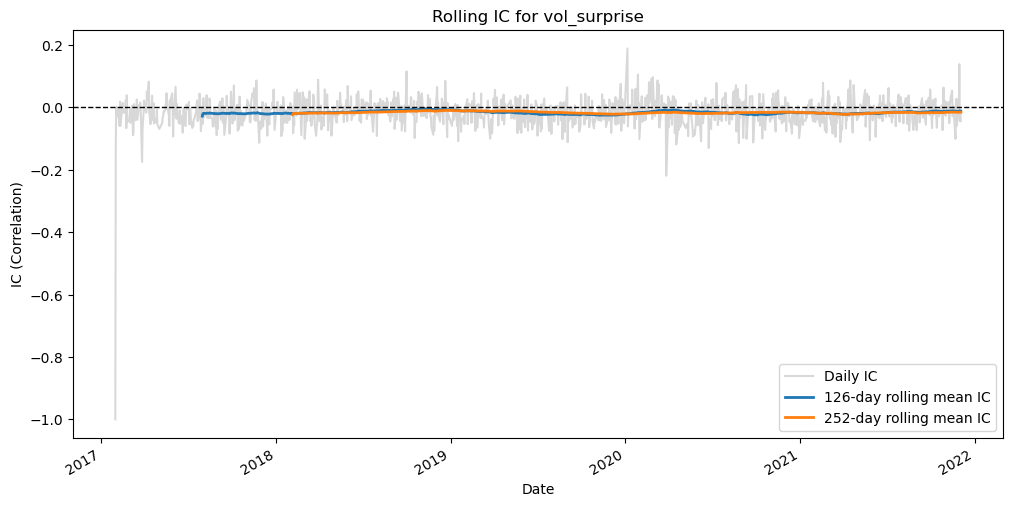

In [20]:
def plot_rolling_ic(ics: pd.Series, signal_name: str, windows=[126, 252]):
    plt.figure(figsize=(12,6))
    ics.plot(alpha=0.3, color="grey", label="Daily IC")
    for w in windows:
        ics.rolling(w).mean().plot(label=f"{w}-day rolling mean IC", lw=2)
    plt.title(f"Rolling IC for {signal_name}")
    plt.axhline(0, color="black", linestyle="--", lw=1)
    plt.title(f"Rolling IC for {signal_name}")
    plt.ylabel("IC (Correlation)")
    plt.xlabel("Date")
    plt.legend()
    plt.show()

plot_rolling_ic(ics, "vol_surprise")

We can see that both 6m and 12m rolling ICs track each other closely, implying the signal's predicative relationship isn't just noise. Since they are alwys negative, it implies the signal has a robust, monotone relationship with the target.This implies its likely a real edge worth testing.

In [21]:
trial_df = new_df[["Date","SecuritiesCode","Target","vol_surprise"]].dropna()
trial_df

,Date,SecuritiesCode,Target,vol_surprise
31726,2017-01-30,1332,-0.014388,0.694583
33550,2017-01-30,9793,0.007134,0.658690
33603,2017-01-31,1332,-0.012774,0.960129
33704,2017-01-31,2003,-0.024752,4.749536
33708,2017-01-31,2053,-0.008249,1.459172
...,...,...,...,...
4722736,2021-12-03,9980,0.007692,0.404096
4722737,2021-12-03,9986,0.004213,0.664336
4722738,2021-12-03,9995,0.030534,0.835901
4722739,2021-12-03,9996,0.022150,0.487805


In [22]:
def assign_deciles(df, signal):
    df = df.copy()
    df["decile"] = pd.qcut(df[signal],10,labels=False, duplicates="drop")+1
    return df
daily_deciles = trial_df.groupby("Date").apply(assign_deciles,signal = "vol_surprise").reset_index()

C:\Users\samue\AppData\Local\Temp\ipykernel_41444\1982370490.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_deciles = trial_df.groupby("Date").apply(assign_deciles,signal = "vol_surprise").reset_index()


ValueError: cannot insert Date, already exists

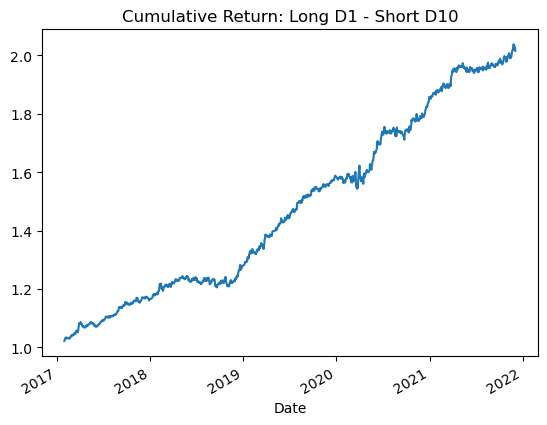

In [ ]:
daily_deciles = daily_deciles.reset_index(drop=True)
decile_returns = (daily_deciles.groupby(["Date","decile"])["Target"].mean().unstack())
ls_returns = decile_returns[1] - decile_returns[10]
cum_return = (1 + ls_returns.fillna(0)).cumprod()
cum_return.plot(title="Cumulative Return: Long D1 - Short D10")
plt.show()

The long–short decile strategy demonstrates strong profitability in backtest, doubling capital over five years. It indicates meaningful predictive power in the ranking signal but requires additional validation and cost-adjusted testing before deployment.

In [24]:
stock_list = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/JPX/stock_list.csv")
stock_list

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,9994,20211230,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2,20211230.0,2447.0,1.084787e+07,2.654474e+10,True
4413,9995,20211230,"GLOSEL Co.,Ltd.",First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2,20211230.0,410.0,2.642680e+07,1.083499e+10,False
4414,9996,20211230,"Satoh&Co.,Ltd.",JASDAQ(Standard / Domestic),Standard Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,-,-,20211230.0,1488.0,9.152640e+06,1.361913e+10,False
4415,9997,20211230,"BELLUNA CO.,LTD.",First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,6,TOPIX Small 1,20211230.0,709.0,9.724447e+07,6.894633e+10,True


In [25]:
v2_df = trial_df.merge(stock_list[["SecuritiesCode","17SectorCode","MarketCapitalization"]], on = "SecuritiesCode", how ="left")
v2_df

,Date,SecuritiesCode,Target,vol_surprise,17SectorCode,MarketCapitalization
0,2017-01-30,1332,-0.014388,0.694583,1,1.696496e+11
1,2017-01-30,9793,0.007134,0.658690,10,2.606100e+11
2,2017-01-31,1332,-0.012774,0.960129,1,1.696496e+11
3,2017-01-31,2003,-0.024752,4.749536,1,3.566197e+10
4,2017-01-31,2053,-0.008249,1.459172,1,2.991633e+10
...,...,...,...,...,...,...
4636966,2021-12-03,9980,0.007692,0.404096,14,1.296577e+10
4636967,2021-12-03,9986,0.004213,0.664336,13,1.247561e+10
4636968,2021-12-03,9995,0.030534,0.835901,13,1.083499e+10
4636969,2021-12-03,9996,0.022150,0.487805,13,1.361913e+10


In [26]:
# Sector-neutral z-score for vol_surprise (by Date x 17SectorCode)

def _z(g):
    s = g["vol_surprise"]
    mu = s.mean()
    sd = s.std(ddof=0)
    if sd == 0 or np.isfinite(sd) is False:
        return (s - mu) * 0.0 
    return (s - mu) / sd

v2_df["signal"] = (
    v2_df.groupby(["Date", "17SectorCode"], group_keys=False).apply(_z)
)


C:\Users\samue\AppData\Local\Temp\ipykernel_41444\1634174836.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  v2_df.groupby(["Date", "17SectorCode"], group_keys=False).apply(_z)


In [27]:
v2_df

,Date,SecuritiesCode,Target,vol_surprise,17SectorCode,MarketCapitalization,signal
0,2017-01-30,1332,-0.014388,0.694583,1,1.696496e+11,0.000000
1,2017-01-30,9793,0.007134,0.658690,10,2.606100e+11,0.000000
2,2017-01-31,1332,-0.012774,0.960129,1,1.696496e+11,-0.844483
3,2017-01-31,2003,-0.024752,4.749536,1,3.566197e+10,1.301535
4,2017-01-31,2053,-0.008249,1.459172,1,2.991633e+10,-0.561865
...,...,...,...,...,...,...,...
4636966,2021-12-03,9980,0.007692,0.404096,14,1.296577e+10,-0.653975
4636967,2021-12-03,9986,0.004213,0.664336,13,1.247561e+10,-0.354829
4636968,2021-12-03,9995,0.030534,0.835901,13,1.083499e+10,-0.087723
4636969,2021-12-03,9996,0.022150,0.487805,13,1.361913e+10,-0.629664


In [28]:
#Build a cap-weighted "market" daily return
mkt = (
    v2_df.dropna(subset=["MarketCapitalization"])
      .groupby("Date")
      .apply(lambda g: np.average(g["Target"], weights=g["MarketCapitalization"]))
      .rename("mkt_ret")
      .to_frame()
)

C:\Users\samue\AppData\Local\Temp\ipykernel_41444\1570995894.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g["Target"], weights=g["MarketCapitalization"]))


In [29]:
v2_df

,Date,SecuritiesCode,Target,vol_surprise,17SectorCode,MarketCapitalization,signal
0,2017-01-30,1332,-0.014388,0.694583,1,1.696496e+11,0.000000
1,2017-01-30,9793,0.007134,0.658690,10,2.606100e+11,0.000000
2,2017-01-31,1332,-0.012774,0.960129,1,1.696496e+11,-0.844483
3,2017-01-31,2003,-0.024752,4.749536,1,3.566197e+10,1.301535
4,2017-01-31,2053,-0.008249,1.459172,1,2.991633e+10,-0.561865
...,...,...,...,...,...,...,...
4636966,2021-12-03,9980,0.007692,0.404096,14,1.296577e+10,-0.653975
4636967,2021-12-03,9986,0.004213,0.664336,13,1.247561e+10,-0.354829
4636968,2021-12-03,9995,0.030534,0.835901,13,1.083499e+10,-0.087723
4636969,2021-12-03,9996,0.022150,0.487805,13,1.361913e+10,-0.629664


In [30]:
#Stock-level rolling vol (for inverse-vol weights) and rolling beta to market
v2_df["Date"] = pd.to_datetime(v2_df["Date"]).dt.normalize()
v2_df = v2_df.drop_duplicates(subset= ["Date","SecuritiesCode"])
wide_ret = v2_df.pivot(index="Date", columns="SecuritiesCode", values="Target").sort_index()
wide_ret

SecuritiesCode,1301,1305,1306,1308,1309,1311,1312,1313,1319,1320,...,9989,9990,9991,9992,9993,9994,9995,9996,9997,25935
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.024871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,-0.003298,0.002548,0.003876,0.003257,0.000000,0.002778,0.011401,0.000000,-0.003788,0.001547,...,-0.006510,0.008368,0.015831,0.000000,-0.000549,-0.000597,-0.001748,0.000000,-0.005013,0.000000
2017-02-02,0.001838,0.003812,0.003861,0.003247,0.002571,0.004155,-0.005904,0.000000,0.007605,0.002575,...,0.001311,0.018257,-0.001732,0.006849,0.003295,-0.011955,-0.001751,0.014542,0.032746,0.001000
2017-02-03,0.002202,-0.001266,-0.002564,-0.003236,-0.010989,-0.002759,-0.015659,0.000000,0.000000,-0.003595,...,-0.006545,-0.024450,0.002602,0.000000,-0.001642,0.020569,0.010526,0.000000,0.032927,-0.001499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,0.003793,0.004192,0.002490,0.005554,0.002850,0.002441,-0.010706,0.043836,0.001932,0.002792,...,-0.017397,0.003846,0.002604,NaN,-0.005357,0.005155,0.010204,0.000672,0.026987,-0.010239
2021-11-30,0.007558,-0.003684,-0.004968,-0.004017,0.011369,0.000000,-0.023119,0.000000,0.000551,-0.005221,...,0.003405,-0.028736,0.010390,NaN,-0.012567,0.009402,-0.025253,0.000000,-0.001460,-0.018719
2021-12-01,0.016706,0.014543,0.016975,0.015881,0.018735,0.008047,0.022910,0.000000,0.010463,0.008747,...,0.023074,0.041420,0.020566,NaN,-0.003030,0.011431,0.020725,0.006711,0.017544,0.003012


In V1 I ran a simple equal-weight decile long/short. For V2, I added inverse-vol weighting and beta-neutralization — I estimated 1-year rolling betas to the market and scaled the legs so net beta ≈ 0. That way, the returns are driven by my vol_surprise signal, not by general market exposure.

In [31]:
mkt = mkt.reindex(wide_ret.index)
roll_vol21 = wide_ret.rolling(21, min_periods=15).std()
rm = mkt["mkt_ret"]
#used for inverse variance scaling within each leg
var_m = rm.rolling(252, min_periods=126).var()


cov_im = wide_ret.apply(lambda col: col.rolling(252, min_periods=126).cov(rm))
#Beta-neutral scaling is between legs
beta252 = cov_im.div(var_m, axis=0)

In [32]:
#Weekly rebalance

is_friday = (wide_ret.index.weekday == 4)
rebal_dates = wide_ret.index[is_friday]

sig_wide = ( v2_df.pivot(index="Date", columns="SecuritiesCode", values="signal") .reindex(rebal_dates) )

# helper to compute beta-neutral scaling coefficients for two legs
def beta_neutral_scales(beta_long, beta_short):
    # cL*beta_L + cS*beta_S = 0, with gross 1 long and 1 short before scaling
    # Use closed form with difference guard
    denom = (beta_short - beta_long)
    if pd.isna(denom) or abs(denom) < 1e-12:
        return 1.0, 1.0  # fallback: do nothing
    cL = (beta_short) / denom
    cS = (beta_long)  / denom
    return float(cL), float(cS)



In [33]:

weights = pd.DataFrame(index=wide_ret.index, columns=wide_ret.columns, dtype=float)
turnover = pd.Series(index=wide_ret.index, dtype=float)


for t in rebal_dates:
    sig_t = sig_wide.loc[t].dropna()
    if sig_t.empty:
        continue
    n = len(sig_t)
    if n < 20:
        continue

    d_edges = np.nanpercentile(sig_t, [10, 90])
    d1_idx  = sig_t.index[sig_t <= d_edges[0]]
    d10_idx = sig_t.index[sig_t >= d_edges[1]]

    # inverse-vol weights (use latest available vol up to t)
    vol_t = roll_vol21.loc[t].reindex(sig_t.index)
    inv_vol = 1.0 / (vol_t.replace(0, np.nan).fillna(vol_t.median()) + 1e-8)

    wL_raw = (inv_vol.reindex(d1_idx)).copy()
    wS_raw = (inv_vol.reindex(d10_idx)).copy()

    # normalize each leg to $1 gross
    wL = wL_raw / wL_raw.sum()
    wS = wS_raw / wS_raw.sum()

    # estimate leg betas from stock betas at t (value-weighted by current leg weights)
    betaL = (beta252.loc[t].reindex(wL.index) * wL).sum(skipna=True)
    betaS = (beta252.loc[t].reindex(wS.index) * wS).sum(skipna=True)

    cL, cS = beta_neutral_scales(betaL, betaS)

    # assemble portfolio weights for date t
    w_t = pd.Series(0.0, index=wide_ret.columns)
    w_t.loc[wL.index] =  cL * wL.values
    w_t.loc[wS.index] = -cS * wS.values

    w_t = w_t.clip(lower=-0.02, upper=0.02)
    # re-normalize gross to ~2.0 after caps
    gross = w_t.abs().sum()
    if gross > 0:
        w_t *= (2.0 / gross)

    weights.loc[t] = w_t

weights = weights.ffill().fillna(0.0)


In [34]:
weights

SecuritiesCode,1301,1305,1306,1308,1309,1311,1312,1313,1319,1320,...,9989,9990,9991,9992,9993,9994,9995,9996,9997,25935
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2017-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2017-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2017-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2017-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.002375,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005303
2021-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.002375,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005303
2021-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.002375,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005303


In [35]:
gross_ret = (weights.shift(1).fillna(0.0) * wide_ret).sum(axis=1)
dw = (weights - weights.shift(1)).abs().sum(axis=1)
turnover.loc[:] = 0.0
turnover.loc[rebal_dates] = dw.loc[rebal_dates].fillna(0.0)

COST_PER_TURNOVER = 0.001
net_ret = gross_ret.copy()
net_ret.loc[rebal_dates] = gross_ret.loc[rebal_dates] - COST_PER_TURNOVER * turnover.loc[rebal_dates]

equity_gross = (1 + gross_ret.fillna(0)).cumprod()
equity_net   = (1 + net_ret.fillna(0)).cumprod()


In [36]:
def perf_stats(r):
    r = r.dropna()
    mu_ann = 252 * r.mean()
    sig_ann = np.sqrt(252) * r.std(ddof=0)
    sharpe = mu_ann / sig_ann if sig_ann > 0 else np.nan
    # Sortino
    dr = r[r < 0]
    dd = np.sqrt(252) * dr.std(ddof=0)
    sortino = mu_ann / dd if dd > 0 else np.nan
    # Max drawdown
    ec = (1 + r).cumprod()
    roll_max = ec.cummax()
    mdd = ((ec / roll_max) - 1).min()
    hit_rate = (r > 0).mean()
    return pd.Series({
        "Ann Return": mu_ann,
        "Ann Vol": sig_ann,
        "Sharpe": sharpe,
        "Sortino": sortino,
        "Max Drawdown": mdd,
        "Hit Rate": hit_rate,
        "Avg Weekly Turnover": turnover.loc[rebal_dates].mean()
    })

metrics_gross = perf_stats(gross_ret)
metrics_net   = perf_stats(net_ret)

summary = pd.concat(
    {"Gross": metrics_gross, "Net (after costs)": metrics_net},
    axis=1
)
summary

,Gross,Net (after costs)
Ann Return,0.012374,-0.151427
Ann Vol,0.037264,0.042656
Sharpe,0.332065,-3.549957
Sortino,0.461285,-4.743145
Max Drawdown,-0.078987,-0.511573
Hit Rate,0.503797,0.408439
Avg Weekly Turnover,3.182862,3.182862


Ways to improve:

Reduce Turnover

Try sector-neutral quintiles instead of deciles (more stable portfolios).

Standardize by market cap buckets to reduce micro-cap noise.

Apply turnover penalty when ranking: keep as much overlap with prior portfolio as possible.

In [81]:
data_train = new_df[new_df['Date']<'2022-04-01']
data_test = new_df[new_df['Date']>'2022-04-01']

In [82]:
data_train = data_train.drop(['Date',"RowId","ForecastEarningsPerShare"], axis=1).dropna()

In [83]:
X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

In [84]:
X_train["SupervisionFlag"]=X_train["SupervisionFlag"].astype(int)

In [85]:
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()

In [86]:
print(X_train.dtypes)

const               float64
SecuritiesCode        int64
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
AdjustmentFactor    float64
ExpectedDividend    float64
SupervisionFlag       int32
dtype: object


In [87]:

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1080.
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:09:56   Log-Likelihood:             1.0274e+07
No. Observations:             4622771   AIC:                        -2.055e+07
Df Residuals:                 4622761   BIC:                        -2.055e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0006      0.000  